In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

from scipy.stats import linregress

def plot_histogram(text, bins=20, w=4, h=2):
    
    author = '{} {}'.format(text.get('authorFirst'), text.get('authorLast'))
    print('{} ({}, {})'.format(text['title'], author, text['year']))
    
    plt.figure(figsize=(w,h))
    plt.hist(text['offsets'], bins, (0,1))
    plt.show()

In [3]:
from lint_analysis.token_offsets import Dataset

ds = Dataset.from_local('will.json')

Saratoga trunk (Edna Ferber, 1941)


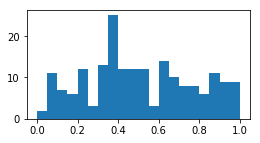

In this our life (Ellen Anderson Gholson Glasgow, 1941)


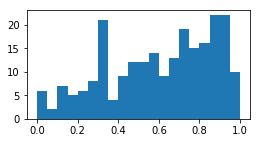

Green centuries (Caroline Gordon, 1941)


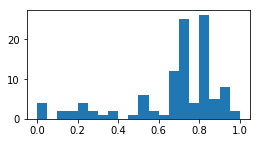

The mutineers (Charles Boardman Hawes, 1941)


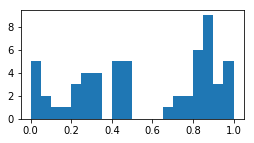

Star spangled summer (Janet Lambert, 1941)


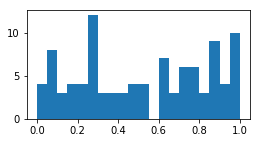

The wife of Martin Guerre (Janet Lewis, 1941)


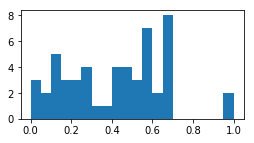

The deadly truth (Helen McCloy, 1941)


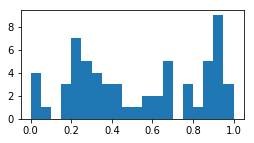

The metal monster (Abraham Merritt, 1941)


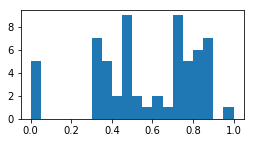

The harp and the blade (John Myers Myers, 1941)


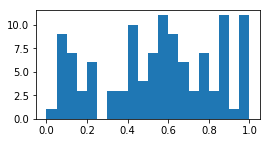

The puzzle of the happy hooligan (Stuart Palmer, 1941)


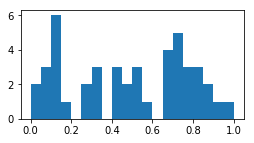

In [4]:
from itertools import islice

data = []
for text in islice(ds.texts(), 10):
    plot_histogram(text)

In [5]:
from numpy.random import multinomial

def sample_series(series, n=1000, *args, **kwargs):
    return multinomial(series.sum(), series/series.sum(), n)

In [6]:
from scipy import stats

def last_bin_zscore(text, bins=20):

    y, _, _, _ = stats.histogram(text['offsets'], bins, (0, 1))

    expected = y.sum() / len(y)
    samples = sample_series(np.full(len(y), expected))

    avg_std = samples.std(1).mean()

    return (y[-1]-expected)/avg_std

In [7]:
data = []
for text in ds.texts():
    zscore = last_bin_zscore(text)
    data.append((zscore, text['year'], text))

In [8]:
import pandas as pd

df = pd.DataFrame(data, columns=('zscore', 'year', 'text'))

In [9]:
df.sort_values('zscore', ascending=False)

,zscore,year,text
15237,57.131055,1996,"{'corpus': 'chicago', 'identifier': '24333', '..."
1903,50.480913,1975,"{'corpus': 'chicago', 'identifier': '21262', '..."
23304,46.932767,1989,"{'corpus': 'chicago', 'identifier': '23103', '..."
7527,44.838222,1970,"{'corpus': 'chicago', 'identifier': '20887', '..."
20391,35.590201,1993,"{'corpus': 'chicago', 'identifier': '23925', '..."
25609,27.516599,1870,"{'corpus': 'gale', 'identifier': 'AMFCF0002-C0..."
8241,26.793538,1984,"{'corpus': 'chicago', 'identifier': '22284', '..."
13147,21.339083,1963,"{'corpus': 'chicago', 'identifier': '20531', '..."
13263,18.587319,1985,"{'corpus': 'chicago', 'identifier': '22400', '..."
15923,18.168739,1985,"{'corpus': 'chicago', 'identifier': '22417', '..."


In [11]:
import statsmodels.api as sm

X = df['year']
y = df['zscore']

X = sm.add_constant(X)
fit = sm.OLS(y, X).fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 zscore   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     235.7
Date:                Fri, 28 Apr 2017   Prob (F-statistic):           5.68e-53
Time:                        13:28:59   Log-Likelihood:                -58014.
No. Observations:               26971   AIC:                         1.160e+05
Df Residuals:                   26969   BIC:                         1.160e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7455      0.530    -14.621      0.000      -8.784      -6.707
year           0.0042      0.000     15.353      0.000       0.004       0.005
==============================================================================
Omnibus:                    23113.998   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3646788.076
Skew:                           3.462   Prob(JB):                         0.00
Kurtosis:                      59.543   Cond. No.                     8.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

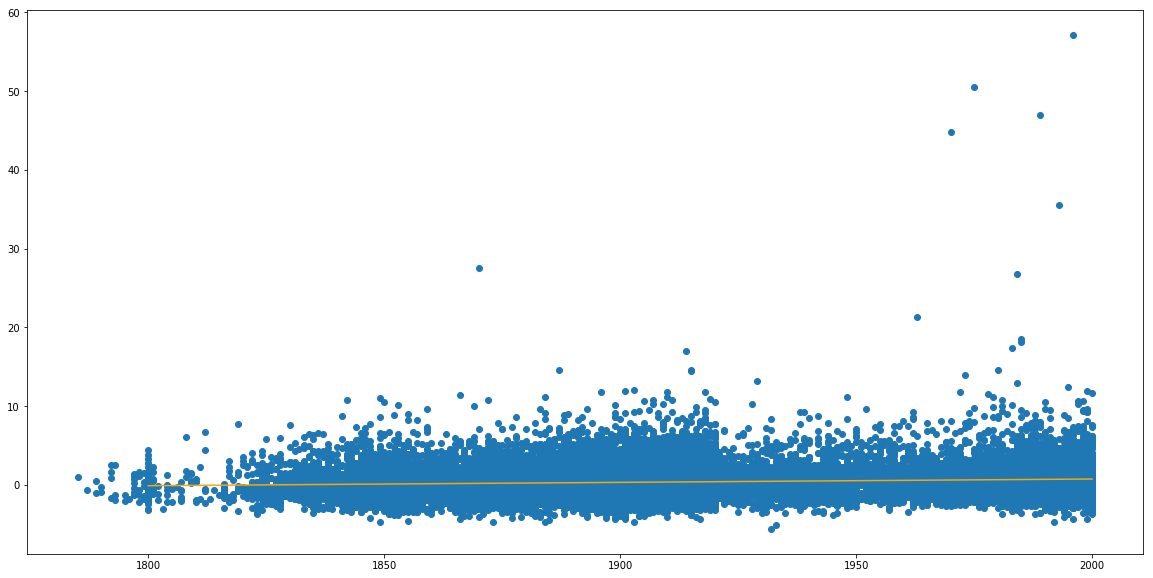

In [12]:
plt.figure(figsize=(20, 10))
plt.scatter(df['year'], df['zscore'])

x1 = 1800
x2 = 2000
y1 = fit.params[1]*x1 + fit.params[0]
y2 = fit.params[1]*x2 + fit.params[0]

plt.plot([x1, x2], [y1, y2], c='orange')

plt.show()

Butterfly weed (Donald Harington, 1996)


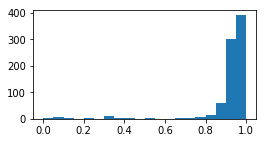

The architecture of the Arkansas Ozarks (Donald Harington, 1975)


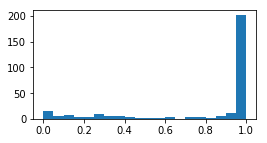

The cockroaches of Stay More (Donald Harington, 1989)


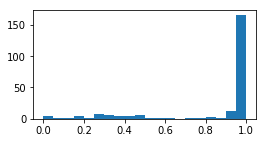

Lightning bug (Donald Harington, 1970)


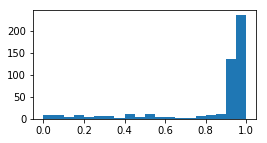

Ekaterina (Donald Harington, 1993)


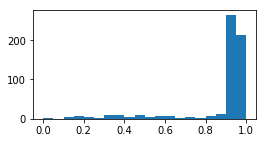

The Comic History of the United States: From a Period Prior to the Discovery of America to Times Long Subsequent to the Present: By John D. Sherwood... With Original Illustrations by Harry Scratchly (John Sherwood, 1870)


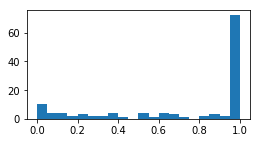

Scumbler (William Wharton, 1984)


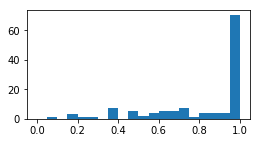

Herzog (Saul Bellow, 1963)


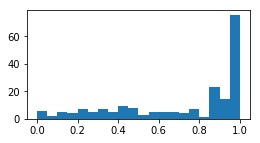

The nuclear age (Tim O'Brien, 1985)


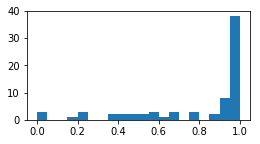

The memory of whiteness (Kim Stanley Robinson, 1985)


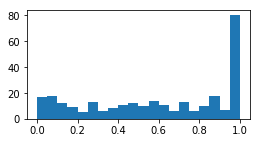

Gods of riverworld (Philip Jose Farmer, 1983)


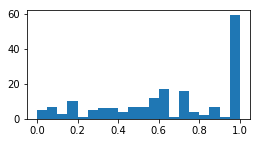

"Persons Unknown": By Virginia Tracy; Illustrations by Henry Raleigh (Virginia Tracy, 1914)


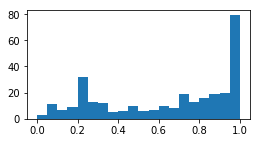

The Scarlet Plague: By Jack London; Illustrated by Gordon Grant (Jack London, 1915)


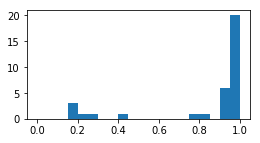

The Yoke of the Thorah: By Sidney Luska (Henry Harland, 1887)


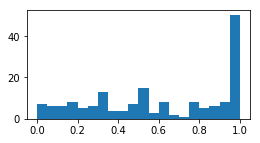

Stepping (Nancy Thayer, 1980)


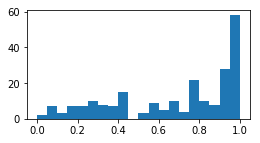

The scarlet plague (Jack London, 1915)


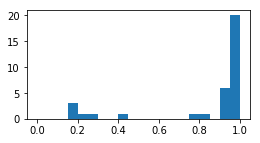

The man who folded himself (David Gerrold, 1973)


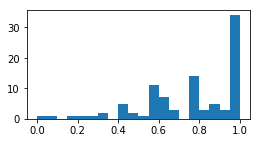

The prodigal girl (Grace Livingston Hill, 1929)


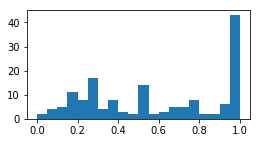

The cheer leader (Jill McCorkle, 1984)


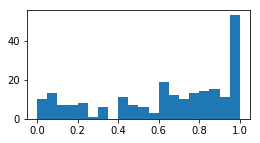

Jasmine nights (S. P Somtow, 1995)


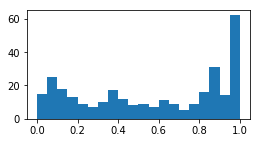

Deep Sea Vagabonds: By Albert Sonnichsen (Albert Sonnichsen, 1903)


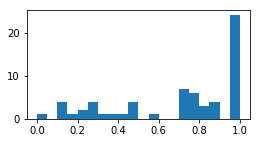

Phelps and His Teachers: By Dan V. Stephens; Decorations by Nina E. Lumbard (Dan Stephens, 1901)


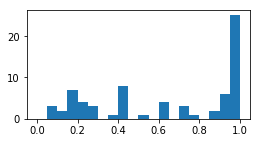

Gravity dreams (L. E. Modesitt, 1999)


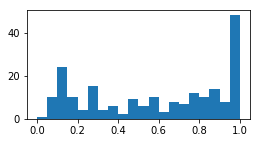

Yozondè of the Wilderness: By Harry Irving Greene (Harry Greene, 1910)


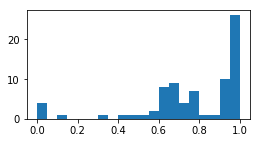

Confessions of That Little English Girl: Or, so Inexperienced: By Elsie M. Cawthorne … (Elsie Cawthorne, 1896)


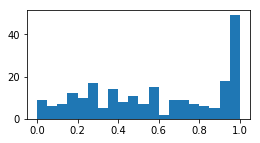

Wallflowers: By Nigel Waldo; Illustrated by Arthur Little (Nigel Waldo, 1918)


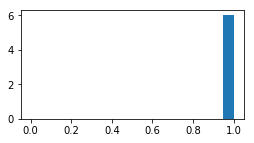

The gods themselves (Isaac Asimov, 1972)


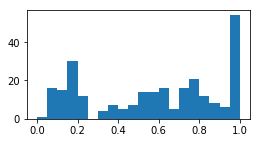

Passing by Samaria (Sharon Ewell Foster, 2000)


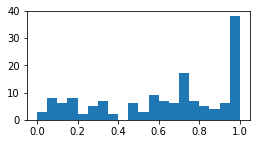

The wolves of Paris (Daniel P. Mannix, 1978)


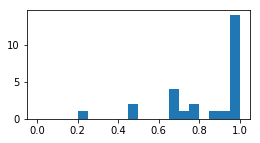

Among the Guerillas: By Edmund Kirke (James Gilmore, 1866)


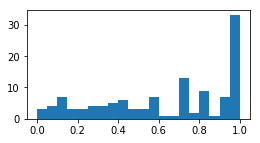

Brain (Robin Cook, 1979)


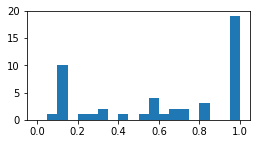

Dark Bahama (Peter Cheyney, 1948)


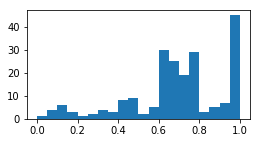

Utopia: Or, the History of an Extinct Planet: By Alfred Denton Cridge (Alfred Cridge, 1884)


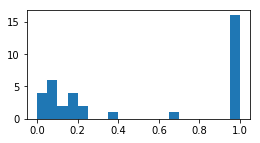

Lost Face (Jack London, 1910)


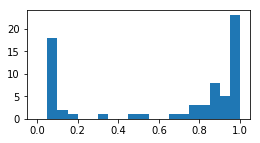

The Gold Mines of the Gila: A Sequel to Old Hicks the Guide: By Charles W. Webber (Charles Webber, 1849)


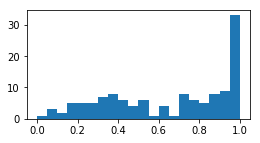

Flames of Glory: By Hervey Smith McCowan (Hervey McCowan, 1919)


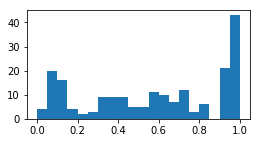

An American Girl Abroad: By Adeline Trafton; Illustrated by Miss L. B. Humphrey (Adeline Trafton, 1872)


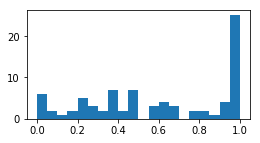

The Amazonian Republic: Recently Discovered in the Interior of Peru: By Ex-Midshipman Timothy Savage (Timothy Savage, 1842)


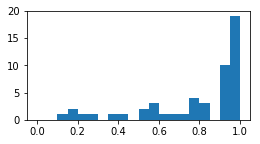

The Web of Destiny: By Mary A. L. Bliven (Mary Bliven, 1907)


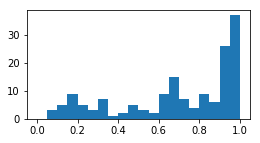

Bread upon the waters (Irwin Shaw, 1981)


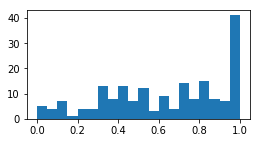

Jeremiah's Sammy: Charles Sumner Gabriel (Charles Gabriel, 1911)


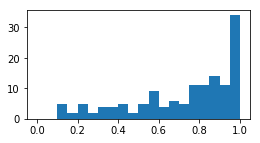

Shards of a broken crown (Raymond E Feist, 1998)


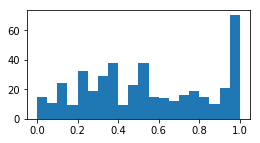

Assassin's quest (Margaret Astrid Lindholm Ogden, 1997)


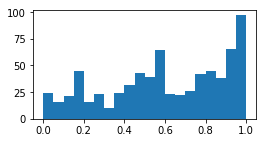

Ben Blair: The Story of a Plainsman: By Will Lillibridge; with Frontispiece in Full Color by Maynard Dixon (William Lillibridge, 1905)


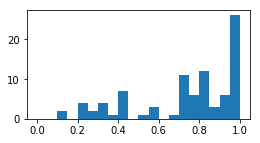

Cruising in the Last War: By Charles J. Peterson (Charles Peterson, 1850)


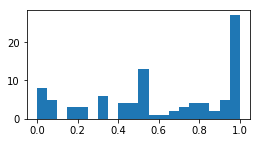

Carmen dog (Carol Emshwiller, 1990)


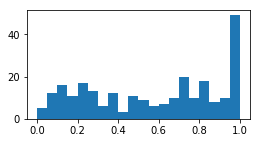

A New Robinson Crusoe: A New Version of His Life and Adventures, with an Explanatory Note: By Gilson Gardner (Gilson Gardner, 1920)


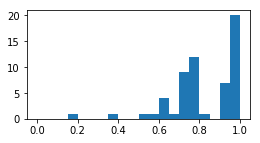

Toward the end of time (John Updike, 1997)


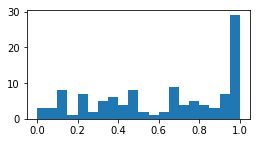

An Eastern Lion in the West: Or Marvelous Find of an Ideal: By M. Y. T. H. Myth (M. Myth, 1909)


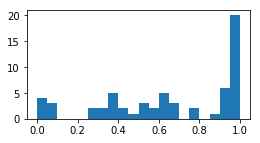

The daughter of the Hawk (C. S. Forester, 1928)


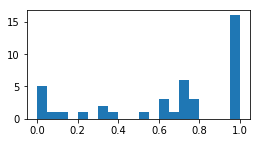

In [13]:
for text in df.sort_values('zscore', ascending=False)['text'].head(50):
    plot_histogram(text)